In [29]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib.dates

In [2]:
data = pd.read_csv("../data/GHG Intensity.csv")

In [3]:
data.head()

,DateStamp,Date,Hour,Nuclear,Hydro,Gas,Wind,Coal,Other,Biofuel,Solar,Import,Export,Net,GHGIntensity
0,1/1/2019 0:00,1/1/2019,0,11219,3136,232,1897,0,0,16,0,237,2975,2738,7.863190
1,1/1/2019 1:00,1/1/2019,1,11215,3320,232,1302,0,0,10,0,253,3124,2871,8.052427
2,1/1/2019 2:00,1/1/2019,2,11221,3273,233,1146,0,0,10,0,264,3424,3160,8.174323
3,1/1/2019 3:00,1/1/2019,3,11205,3221,233,992,0,0,10,0,264,3383,3119,8.290197
4,1/1/2019 4:00,1/1/2019,4,11205,3203,234,876,0,0,10,0,145,3402,3257,8.401484


In [4]:
data.describe()

,Hour,Nuclear,Hydro,Gas,Wind,Coal,Other,Biofuel,Solar,Import,Export,Net,GHGIntensity
count,17577.000000,17577.000000,17577.000000,17577.000000,17577.000000,17577.0,17577.0,17577.000000,17577.000000,17577.000000,17577.000000,17577.000000,17577.000000
mean,11.497184,10111.046766,4100.212664,1130.680776,1303.517779,0.0,0.0,35.690277,75.421915,673.018547,2319.803323,1646.784776,25.524180
std,6.919518,972.466648,750.984013,1095.506792,1012.567029,0.0,0.0,41.252692,113.821186,627.670883,605.085349,1031.516162,21.949243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,440.000000,-1701.000000,0.000000
25%,6.000000,9317.000000,3558.000000,257.000000,473.000000,0.0,0.0,4.000000,0.000000,115.000000,1913.000000,865.000000,7.504310
50%,11.000000,10060.000000,4083.000000,747.000000,1018.000000,0.0,0.0,26.000000,2.000000,419.000000,2281.000000,1693.000000,17.220477
75%,17.000000,10788.000000,4630.000000,1635.000000,1945.000000,0.0,0.0,48.000000,125.000000,1237.000000,2701.000000,2420.000000,37.555780
max,23.000000,12208.000000,6487.000000,7060.000000,4602.000000,0.0,0.0,267.000000,432.000000,2720.000000,4466.000000,4432.000000,114.149474


In [5]:
## tbd
## trends of energy
### hourly, daily, monthly, yearly
### split by types


In [4]:
data[['month','day','year']] = data['Date'].str.split("/", expand = True)

In [5]:
data

,DateStamp,Date,Hour,Nuclear,Hydro,Gas,Wind,Coal,Other,Biofuel,Solar,Import,Export,Net,GHGIntensity,month,day,year
0,1/1/2019 0:00,1/1/2019,0,11219,3136,232,1897,0,0,16,0,237,2975,2738,7.863190,1,1,2019
1,1/1/2019 1:00,1/1/2019,1,11215,3320,232,1302,0,0,10,0,253,3124,2871,8.052427,1,1,2019
2,1/1/2019 2:00,1/1/2019,2,11221,3273,233,1146,0,0,10,0,264,3424,3160,8.174323,1,1,2019
3,1/1/2019 3:00,1/1/2019,3,11205,3221,233,992,0,0,10,0,264,3383,3119,8.290197,1,1,2019
4,1/1/2019 4:00,1/1/2019,4,11205,3203,234,876,0,0,10,0,145,3402,3257,8.401484,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17572,1/1/2021 19:00,1/1/2021,19,9683,4791,439,1969,0,0,0,0,1803,2017,214,11.976308,1,1,2021
17573,1/1/2021 20:00,1/1/2021,20,9782,5029,440,1924,0,0,0,0,1307,2221,914,11.796440,1,1,2021
17574,1/1/2021 21:00,1/1/2021,21,9797,4813,435,1569,0,0,0,0,1966,2542,576,12.068419,1,1,2021
17575,1/1/2021 22:00,1/1/2021,22,9802,4582,294,1495,0,0,0,0,2051,2540,489,8.737320,1,1,2021


In [10]:
data_by_month_year = data.groupby(['year','month']).sum()
data_by_year = data.groupby('year').sum()
data_by_month = data.groupby('month').sum()

In [8]:
data['DateStamp_converted'] =  pd.to_datetime(data['DateStamp'])

In [22]:
data.dtypes

DateStamp                      object
Date                           object
Hour                            int64
Nuclear                         int64
Hydro                           int64
Gas                             int64
Wind                            int64
Coal                            int64
Other                           int64
Biofuel                         int64
Solar                           int64
Import                          int64
Export                          int64
Net                             int64
GHGIntensity                  float64
month                          object
day                            object
year                           object
DateStamp_converted    datetime64[ns]
dtype: object

In [15]:
x_values = data['DateStamp_converted']
y_values = data['GHGIntensity']

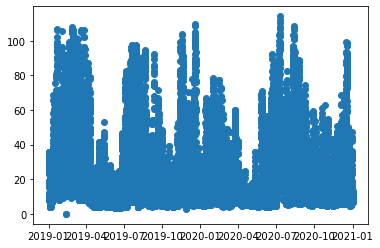

In [18]:
dates = matplotlib.dates.date2num(x_values)
matplotlib.pyplot.plot_date(dates, y_values)

In [23]:
data_2019 = data[data['year']=='2019']

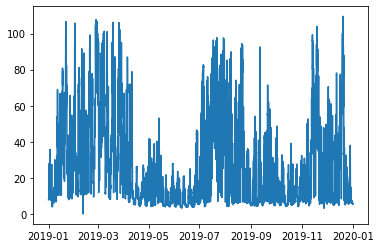

In [30]:
x_values = data_2019['DateStamp_converted']
y_values = data_2019['GHGIntensity']

# dates = matplotlib.dates.date2num(x_values)
plt.plot(x_values, y_values)
plt.show()

In [27]:
data_2019['year'].nunique()

1

In [31]:
data_by_month_year

Hour  Nuclear    Hydro      Gas     Wind  Coal  Other  Biofuel  \
year month                                                                   
2019 1      8556  8003204  3344536   968401  1442347     0      0    25751   
     10     8556  7867320  2643220   315417   823483     0      0    13004   
     11     8280  7104752  2934255   900404  1151184     0      0    32073   
     12     8556  7989846  2987554   846906  1314140     0      0    29239   
     2      7728  6263762  3099363  1290397  1208853     0      0    17905   
     3      8556  6507477  3115654  1301226  1275066     0      0    29007   
     4      8280  6538293  3063179   454237  1069491     0      0    24883   
     5      8556  6936563  3543895   385334   638002     0      0    26313   
     6      8280  8070155  3116178   279849   381000     0      0    20183   
     7      8556  8423354  2921732  1601677   513307     0      0    34837   
     8      8556  8473535  2478178   972596   510597     0      0    32835   
     9      8280  7689678  2338974   512902   700829     0      0    24967   
2020 1      8832  8652074  3285708   939889  1239508     0      0    36626   
     10     8556  6932520  2865990   562191   903011     0      0    28259   
     11     8280  6767239  2954644   436380  1286487     0      0    17051   
     12     8556  6812042  3217069   985136  1404642     0      0    34122   
     2      8004  6953974  3120092   836640  1369793     0      0    20078   
     3      8556  7417991  3143504   618019  1217817     0      0    28269   
     4      8124  6945656  2888969   271818   954552     0      0    22298   
     5      8556  6960119  3144625   461259   880918     0      0    31611   
     6      8280  7454775  3171718   900810   606467     0      0    23614   
     7      8556  8506195  3245996  1875301   516148     0      0    31846   
     8      8490  7600275  2740465  1452349   582602     0      0    17197   
     9      8280  6624432  2605155   697726   894953     0      0    25334   
2021 1       276   226638    98785     7112    26735     0      0       26   

            Solar  Import   Export      Net  GHGIntensity  
year month                                                 
2019 1      23456  639650  1754048  1114398  22581.145139  
     10     43940  225868  1631686  1405818   9077.921497  
     11     25750  546267  1529818   983551  21062.231203  
     12     18778  464735  1774535  1309800  19307.528025  
     2      28183  766943  1502722   735779  31053.648909  
     3      55293  859104  1599194   740090  33868.676874  
     4      59621  475495  1547939  1072444  13398.889082  
     5      66470  241056  1816951  1575895  10486.485347  
     6      72453  180337  1937463  1757126   7379.380143  
     7      85084  861290  1745125   883835  35648.991757  
     8      83167  832690  1636398   803708  22902.202041  
     9      66248  519798  1597404  1077606  13844.967993  
2020 1      18782  381165  2133861  1752696  16483.116475  
     10     47208  365362  1408439  1043077  14144.269113  
     11     35416  447116  1478941  1031825  10145.865058  
     12     18614  911498  1611689   700191  21607.574776  
     2      38951  602023  1774069  1172046  18826.287771  
     3      56484  240307  1827464  1587157  14823.541633  
     4      69694   52252  2118370  2066118   5870.072898  
     5      82691  153915  2188554  2034639   9517.129043  
     6      92095  278655  1822862  1544207  19607.024033  
     7      88267  624266  1743414  1119148  30698.448591  
     8      81912  732881  1302054   569173  29742.962215  
     9      66786  383950  1240419   856469  16330.817826  
2021 1        348   43024    51764     8740    229.326702